# SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
def plotar_espaço_2d(X, y):
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Classe 1')
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Classe 0')

    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')

    plt.legend()
    plt.grid(True)
    plt.gca().set_axisbelow(True)


In [ ]:
def plotar_modelo(X, y, clf, pontosX=None, pontosy=None):
    if pontosX is None:
        pontosX = X
    if pontosy is None:
        pontosy = y

    x_min = min(X[:, 0].min(), pontosX[:, 0].min()) - 0.5
    x_max = max(X[:, 0].max(), pontosX[:, 0].max()) + 0.5

    y_min = min(X[:, 1].min(), pontosX[:, 1].min()) - 0.5
    y_max = max(X[:, 1].max(), pontosX[:, 1].max()) + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr.reversed(), alpha=0.2)

    plt.scatter(pontosX[pontosy==1][:, 0], pontosX[pontosy==1][:, 1], c='blue', label='Classe 1')
    plt.scatter(pontosX[pontosy==0][:, 0], pontosX[pontosy==0][:, 1], c='red', label='Classe 0')

    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')

    plt.legend()
    plt.grid(True)
    plt.gca().set_axisbelow(True)


In [ ]:
def plotar_svm(X, y, clf, pontosX=None, pontosy=None):
    if pontosX is None:
        pontosX = X
    if pontosy is None:
        pontosy = y

    x_min = min(X[:, 0].min(), pontosX[:, 0].min()) - 0.5
    x_max = max(X[:, 0].max(), pontosX[:, 0].max()) + 0.5

    y_min = min(X[:, 1].min(), pontosX[:, 1].min()) - 0.5
    y_max = max(X[:, 1].max(), pontosX[:, 1].max()) + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Z2 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr.reversed(), alpha=0.2)
    contours = plt.contour(xx, yy, Z2, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', alpha=0.7)

    plt.scatter(pontosX[pontosy==1][:, 0], pontosX[pontosy==1][:, 1], c='blue', label='Classe 1')
    plt.scatter(pontosX[pontosy==0][:, 0], pontosX[pontosy==0][:, 1], c='red', label='Classe 0')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')

    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')

    plt.legend()
    plt.grid(True)
    plt.gca().set_axisbelow(True)

In [ ]:
def gerar_problema_1(n_pos, n_neg, semente=42):
    np.random.seed(semente)

    x_pos = np.random.uniform(0, 2, n_pos)
    y_pos = 7 * x_pos + np.random.normal(0, 0.5, n_pos)

    x_neg = np.random.uniform(0, 2, n_neg)
    y_neg = 6.5 * x_neg - 3 + np.random.normal(0, 0.5, n_neg)

    # Combinar
    X = np.vstack((
        np.column_stack((x_pos, y_pos)),
        np.column_stack((x_neg, y_neg))
    ))
    y = np.hstack((
        np.ones(n_pos),
        np.zeros(n_neg)
    ))

    return X, y

In [ ]:
from sklearn.datasets import make_moons

def gerar_problema_2(n_pos, n_neg, semente=42):
    X, y = make_moons(n_samples=(n_pos, n_neg), noise=0.15, random_state=semente)

    # 2. Ajustar escala e rotação leve para parecer com a imagem
    X[:, 0] = X[:, 0] * 2  # estica horizontalmente
    X[:, 1] = X[:, 1] * 1.5  # estica verticalmente


    return X, y

## Problema de separação linear

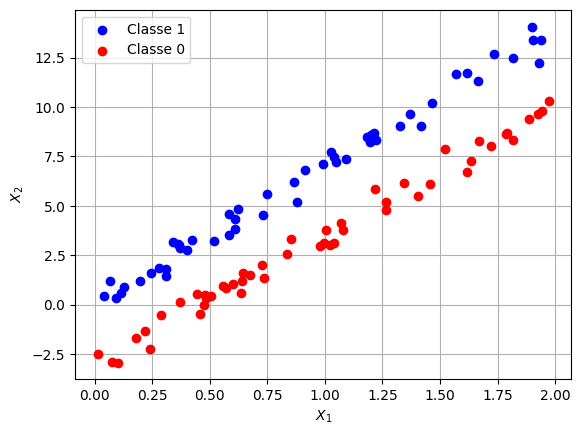

In [ ]:
X, y = gerar_problema_1(50, 50)
plotar_espaço_2d(X, y)

### Classificação com uma árvore de decisão

Tentando classificar com uma árvore de decisão

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X, y);

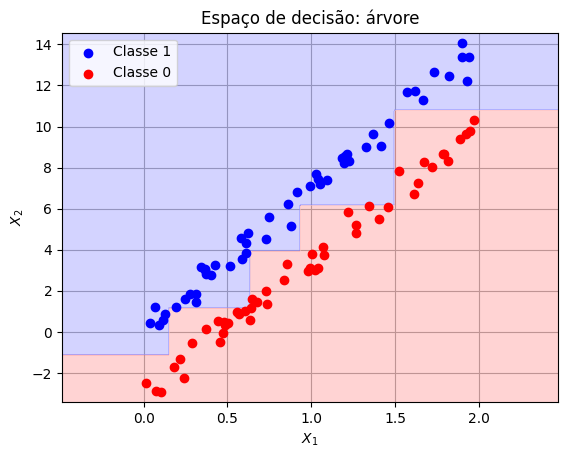

In [ ]:
plt.title('Espaço de decisão: árvore')
plotar_modelo(X, y, arvore)

### Classificação com um SVM

In [ ]:
clf = SVC(kernel='linear', C=1e16)
clf.fit(X, y);

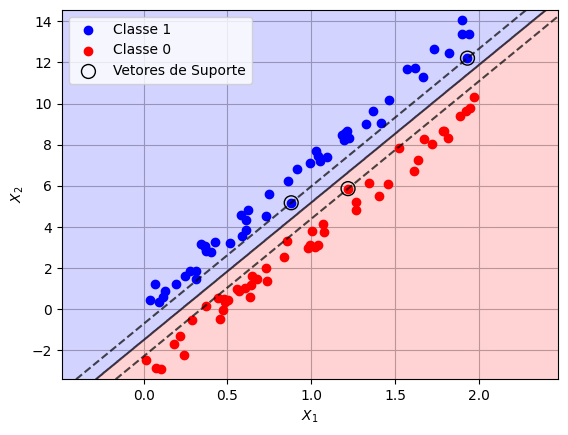

In [ ]:
plotar_svm(X, y, clf)

### Comparação com conjuntos de treino e teste

In [ ]:
X_train, y_train = gerar_problema_1(20, 20)
X_teste, y_teste = gerar_problema_1(50, 50, 13)

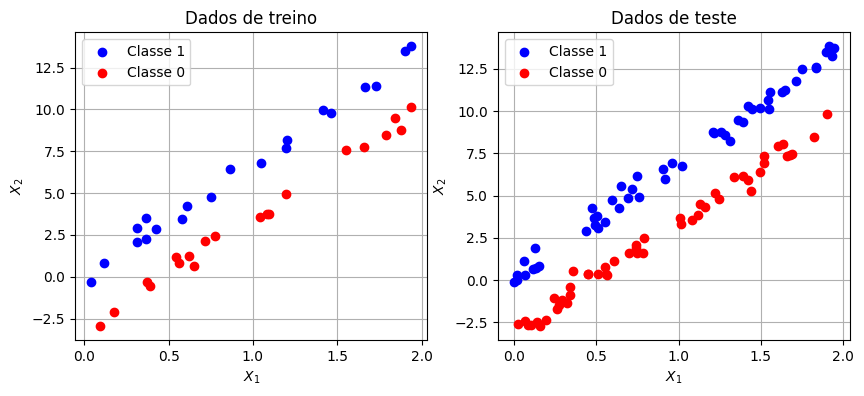

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Dados de treino')
plotar_espaço_2d(X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Dados de teste')
plotar_espaço_2d(X_teste, y_teste)

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train);

svm = SVC(kernel='linear', C=1e10)
svm.fit(X_train, y_train);

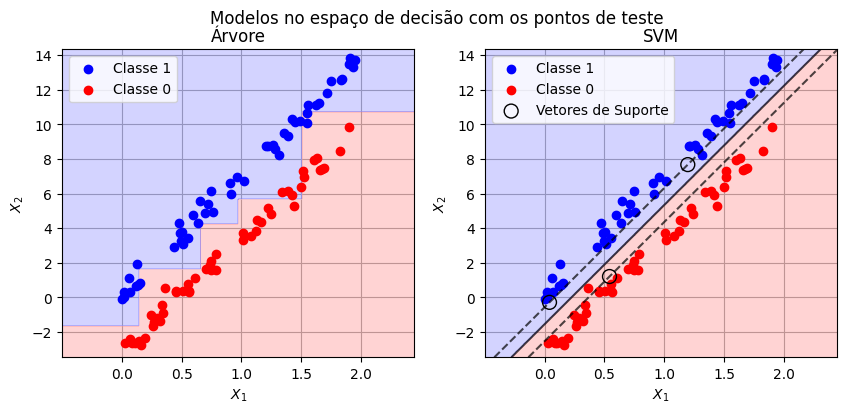

In [ ]:
plt.figure(figsize=(10, 4))
plt.suptitle('Modelos no espaço de decisão com os pontos de teste')

plt.subplot(1, 2, 1)
plt.title('Árvore')
plotar_modelo(X_train, y_train, arvore, X_teste, y_teste)

plt.subplot(1, 2, 2)
plt.title('SVM')
plotar_svm(X_train, y_train, svm, X_teste, y_teste)


### Margem flexível: variando C

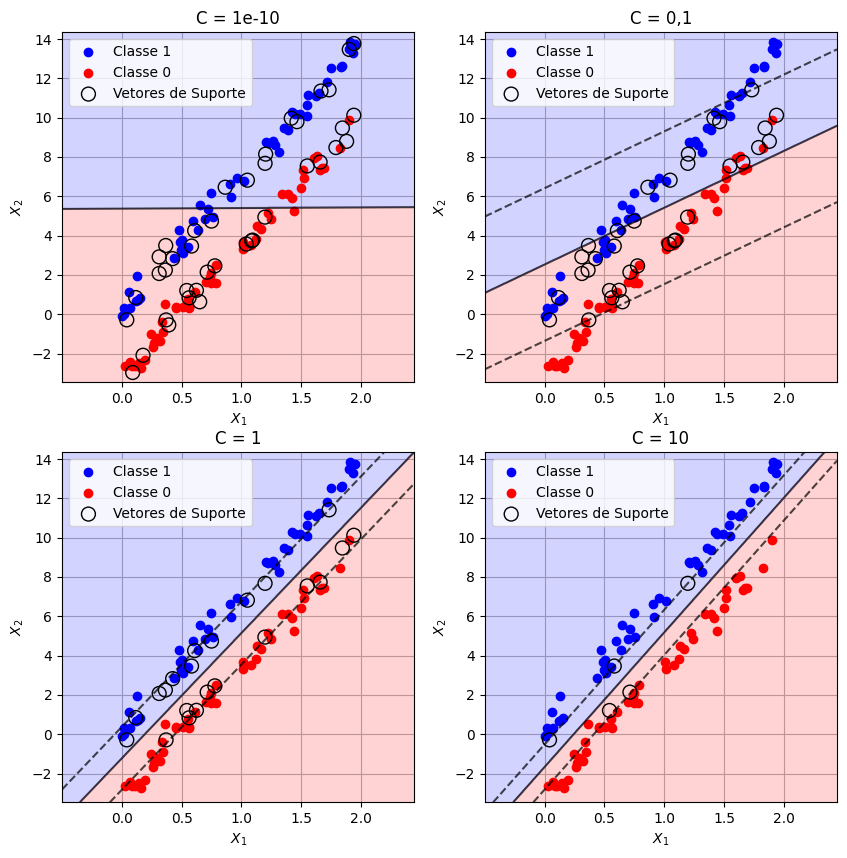

In [ ]:
Cs = [1e-10, 0.1, 1, 10]
Cstr = ['1e-10', '0,1', '1', '10']

plt.figure(figsize=(10, 10))

for i in range(4):
    svm = SVC(kernel='linear', C=Cs[i])
    svm.fit(X_train, y_train);

    plt.subplot(2, 2, i+1)
    plt.title('C = ' + Cstr[i])
    plotar_svm(X_train, y_train, svm, X_teste, y_teste)

## Problema não linear

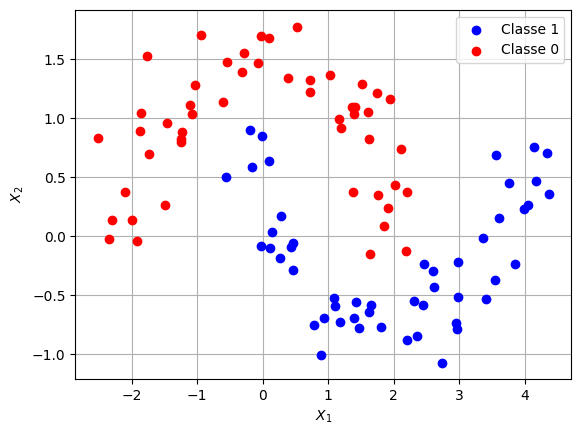

In [ ]:
X, y = gerar_problema_2(50, 50, 2)
plotar_espaço_2d(X, y)

In [ ]:
SVC?

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X, y);

#svm = SVC(kernel='linear', C=10)
svm = SVC(kernel='poly', C=100, degree=2, coef0=-0.5)
svm.fit(X, y);

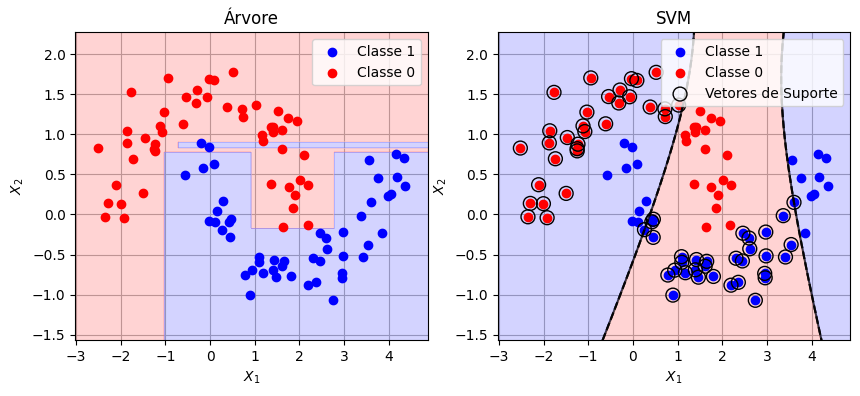

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Árvore")
plotar_modelo(X, y, arvore)

plt.subplot(1, 2, 2)
plt.title("SVM")
plotar_svm(X, y, svm)

### Treino e teste não linear

In [ ]:
[X_train, y_train = gerar_problema_2(20, 20)
X_teste, y_teste = gerar_problema_2(50, 50, 13)

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Dados de treino')
plotar_espaço_2d(X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Dados de teste')
plotar_espaço_2d(X_teste, y_teste)

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X, y);

svm = SVC(kernel='linear', C=10)
svm.fit(X, y);

In [ ]:
plt.figure(figsize=(10, 4))
plt.suptitle('Modelos no espaço de decisão com os pontos de teste')

plt.subplot(1, 2, 1)
plt.title('Árvore')
plotar_modelo(X_teste, y_teste, arvore)

plt.subplot(1, 2, 2)
plt.title('SVM')
plotar_svm(X_teste, y_teste, svm)

### Margem flexível: variando o hiperparâmetro C...

In [ ]:
Cs = [1e-10, 0.1, 1, 10]
Cstr = ['1e-10', '0,1', '1', '10']

plt.figure(figsize=(10, 10))

for i in range(4):
    svm = SVC(kernel='linear', C=Cs[i])
    svm.fit(X, y);

    plt.subplot(2, 2, i+1)
    plt.title('C = ' + Cstr[i])
    plotar_svm(X, y, svm)

## Kernels...

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('Kernel polinomial (d=2)')
plotar_svm(X, y, SVC(kernel='poly', degree=2, C=1, coef0=1).fit(X, y))


plt.subplot(2, 2, 2)
plt.title('Kernel polinomial (d=3, C baixo)')
plotar_svm(X, y, SVC(kernel='poly', degree=3, C=0.1, coef0=1).fit(X, y))

plt.subplot(2, 2, 3)
plt.title('Kernel polinomial (d=3, C alto)')
plotar_svm(X, y, SVC(kernel='poly', degree=3, C=100, coef0=1).fit(X, y))

plt.subplot(2, 2, 4)
plt.title('Kernel polinomial (d=4, C alto)')
plotar_svm(X, y, SVC(kernel='poly', degree=4, C=100, coef0=1).fit(X, y))

In [ ]:
plt.figure(figsize=(10, 10))

gamma = [0.1, 1, 2, 5]

for i in range(4):
    svm = SVC(kernel='rbf', gamma=gamma[i])
    svm.fit(X_train, y_train);

    plt.subplot(2, 2, i+1)
    plt.title('$\gamma$ = ' + str(gamma[i]))
    plotar_svm(X_train, y_train, svm, X_teste, y_teste)